In [3]:
import sys
sys.path.append("../")

from utils import *
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [26]:
def calculate_growth_rate_sigmoid(
    h: np.ndarray,
    min_health: int = 1,
    max_health: int = 200,
    scale: float = 0.05,
    k: float = 0.05
) -> np.ndarray:
    """
    Calculates the wealth growth rate based on health using a sigmoid function.

    This function models diminishing returns, where health improvements have the
    greatest impact in the middle of the health range and less impact at the
    extremes.

    Args:
        h (np.ndarray): An array of agent health values.
        min_health (int): The minimum possible health value.
        max_health (int): The maximum possible health value.
        scale (float): The scale of possible growth rates (determines max and min endpoints)
        k (float): The steepness or "gain" of the sigmoid curve.
                     - A smaller k (~0.01) creates a very gradual, almost linear transition.
                     - A larger k (~0.1) creates a very sharp, switch-like transition.
                     - A value of 0.05 is a good starting point.

    Returns:
        np.ndarray: An array of calculated growth rates, one for each agent.
    """
    # 1. Normalize the health value to be centered around 0.
    # This prepares it for the standard logistic function.
    health_midpoint = (min_health + max_health) / 2.0
    normalized_h = k * (h - health_midpoint)

    # 2. Apply the standard logistic (sigmoid) function.
    # The output will be in the range [0, 1].
    sigmoid_output = 1 / (1 + np.exp(-normalized_h))

    # 3. Scale and shift the sigmoid output to the desired rate range.
    output_range = 2 * scale
    r = (sigmoid_output * output_range) - scale

    return r

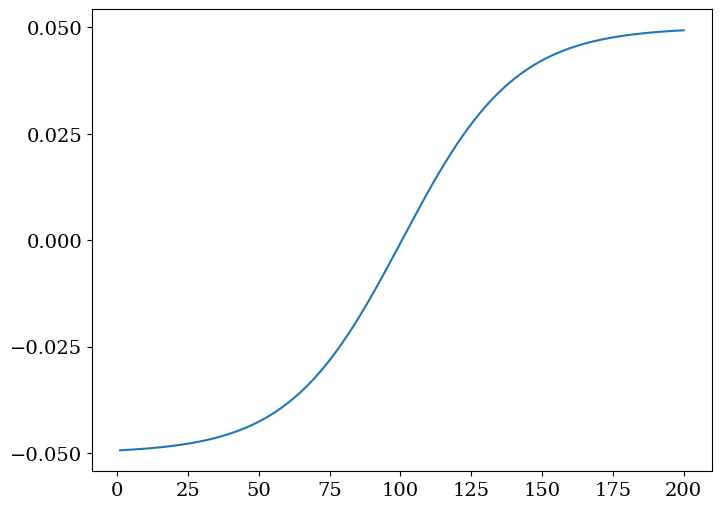

In [30]:
h = np.linspace(1,200,1000)
plt.plot(h, calculate_growth_rate_sigmoid(h, min_health=1, max_health=200, scale=0.05, k=0.05))
plt.yticks(np.linspace(-0.05, 0.05, 5))
plt.show()

In [15]:
123*1.01

124.23